In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import xarray as xr
import IPython.display
import time
import numpy as np
import cartopy.crs as ccrs
import cartopy

In [2]:
ds = xr.open_dataset("data.grib")
ds

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


<xarray.Dataset>
Dimensions:     (time: 323, latitude: 25, longitude: 45)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2023-09-01 ... 2023-10-24T16:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 55.0 54.75 54.5 54.25 ... 49.5 49.25 49.0
  * longitude   (longitude) float64 14.0 14.25 14.5 14.75 ... 24.5 24.75 25.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    t2m         (time, latitude, longitude) float32 ...
    sp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-10-29T19:52 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
ds = ds - 273.15

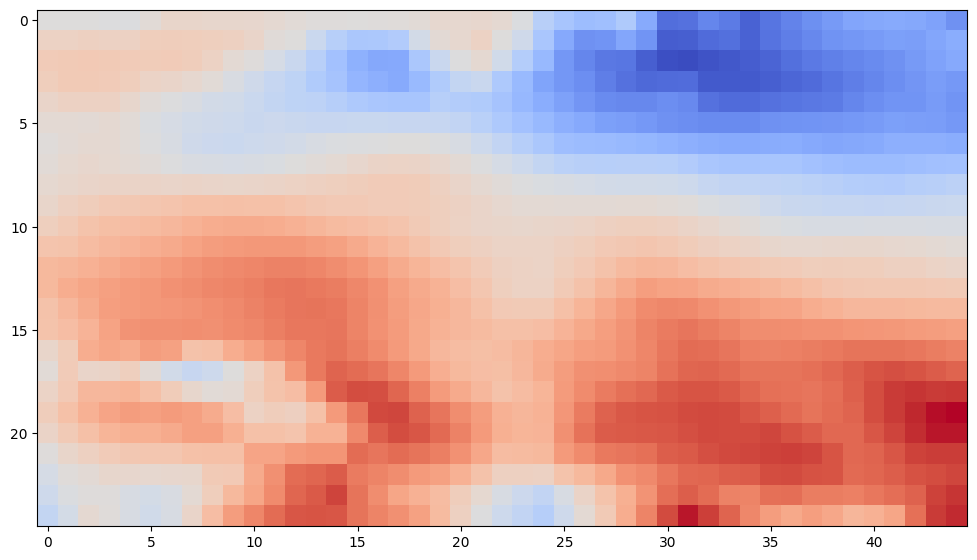

In [4]:
frames = []
fig = plt.figure(figsize=(12,8))

for i in range(ds.t2m.shape[0]):
    frames.append([plt.imshow(ds.t2m[i], cmap=plt.cm.coolwarm, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
ani.save('weather.mp4')
# plt.show()
# https://stackoverflow.com/questions/34975972/how-can-i-make-a-video-from-array-of-images-in-matplotlib

In [5]:
# from IPython.display import HTML
# HTML(ani.to_html5_video())

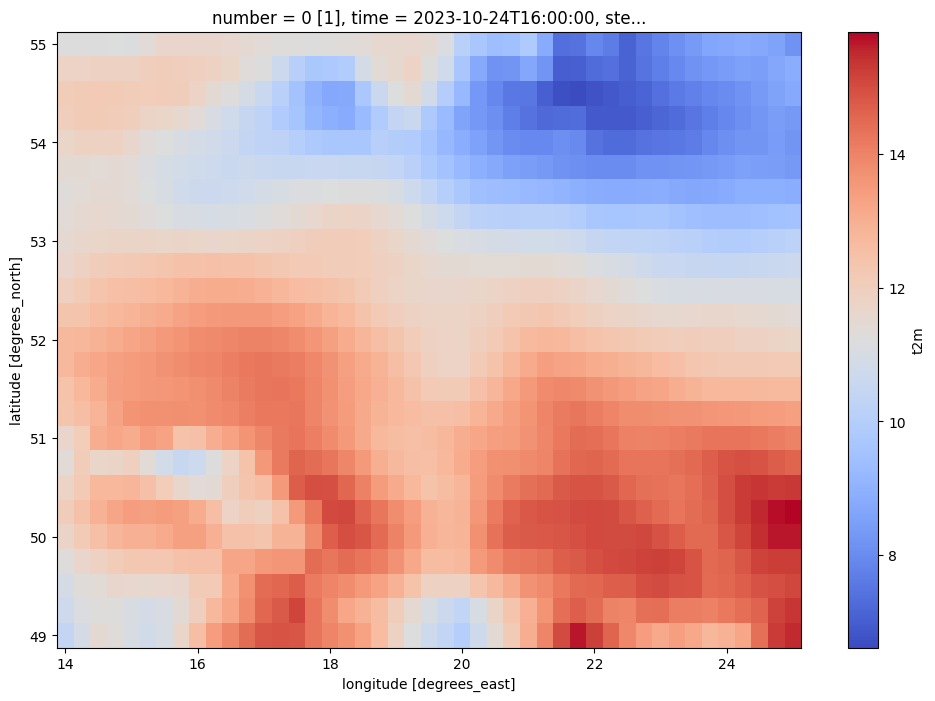

In [6]:
for i in range(ds.t2m.shape[0]):
    IPython.display.clear_output(wait=True)
    plt.figure(figsize=(12,8))
    ds.t2m[i].plot(cmap=plt.cm.coolwarm)
    plt.show()
    time.sleep(0.05)
        

In [7]:
t2m_numpy = ds.t2m.to_numpy()
for i in range(t2m_numpy.shape[0]):
    if np.isnan(t2m_numpy[i]).sum() > 0:
        print(i, "NaN occured")

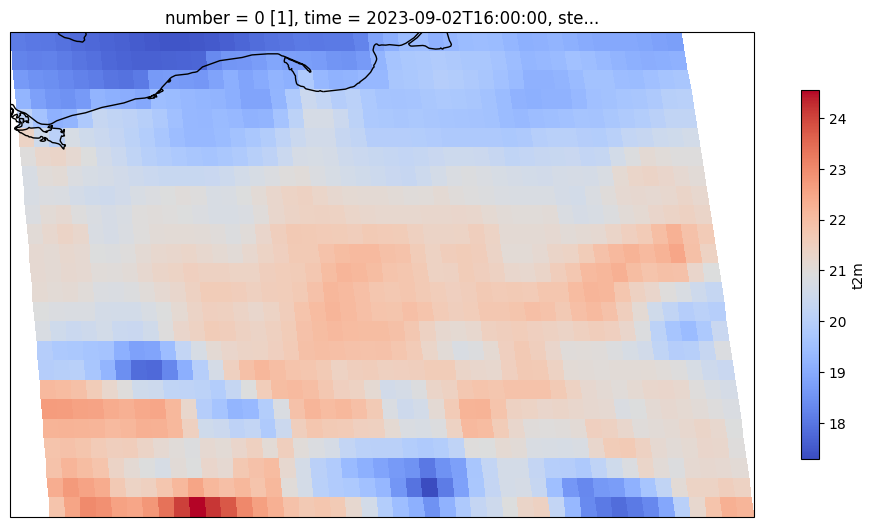

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution="10m")
plot = ds.t2m[10].plot(
    cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
)

# wiekszy obszar w pliku grib powinien rysowac polske ladnie